# WELL LOG DATA

1 and 2, data import and cleaning. data visualization

In [1]:
import lasio as las
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

df = las.read('1051661161.las')
df = df.df()

df['DEPTH'] = df.index
index = list(range(5541))
df['Index'] = index
df.set_index('Index', inplace = True)

In [2]:
df.describe()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR,DEPTH
count,5541.000000,5541.000000,5540.000000,5466.000000,5466.000000,5466.000000,5467.000000,5452.000000,5541.000000,5541.000000,...,5512.000000,5512.000000,5541.000000,5541.000000,5540.000000,5494.000000,5497.000000,5498.000000,5498.000000,5541.000000
mean,0.012272,0.021115,139.910654,18.085643,25.871001,25.780431,28.638905,226.288636,-68.668264,1102.225995,...,12.399068,11.671000,0.078506,95.111759,33.603773,8.274458,38.845337,0.070521,14.762778,1580.000000
std,0.119540,0.155831,92.053635,9.482882,11.012485,9.751341,8.460903,3578.021831,21.135791,239.228427,...,16.065711,17.501263,0.292151,23.985427,16.963060,3.818390,1907.225020,0.077172,9.044476,799.846626
min,0.000000,0.000000,0.000000,-10.381000,-27.299300,-41.596500,-11.857700,-58.279600,-92.380000,602.327200,...,-1.594000,-1.891200,0.000000,-2.492400,-35.426000,4.473900,-2.556100,-3.184200,-82.064400,195.000000
25%,0.000000,0.000000,78.501300,11.179700,20.364025,20.364025,23.832050,67.104700,-85.370000,898.337000,...,4.126400,2.798975,0.000000,80.095700,22.989725,7.998800,2.385200,0.040800,8.676750,887.500000
50%,0.000000,0.000000,118.398800,19.443600,28.286950,28.280950,30.826900,101.855900,-77.990000,1120.542400,...,7.358100,5.537800,0.000000,96.999000,34.937400,8.123650,2.464800,0.059700,14.353900,1580.000000
75%,0.000000,0.000000,183.443200,24.192075,32.062125,32.052275,34.632600,124.645475,-37.020000,1322.002300,...,11.108925,10.935250,0.000000,108.288300,42.920950,8.350400,2.562000,0.088400,18.975050,2272.500000
max,2.000000,2.000000,674.211400,200.707200,400.581900,250.748200,51.426600,100000.000000,-1.720000,1520.791500,...,142.340500,164.806500,2.000000,238.234000,134.819000,173.585200,100000.000000,0.270500,158.479500,2965.000000


<Axes: >

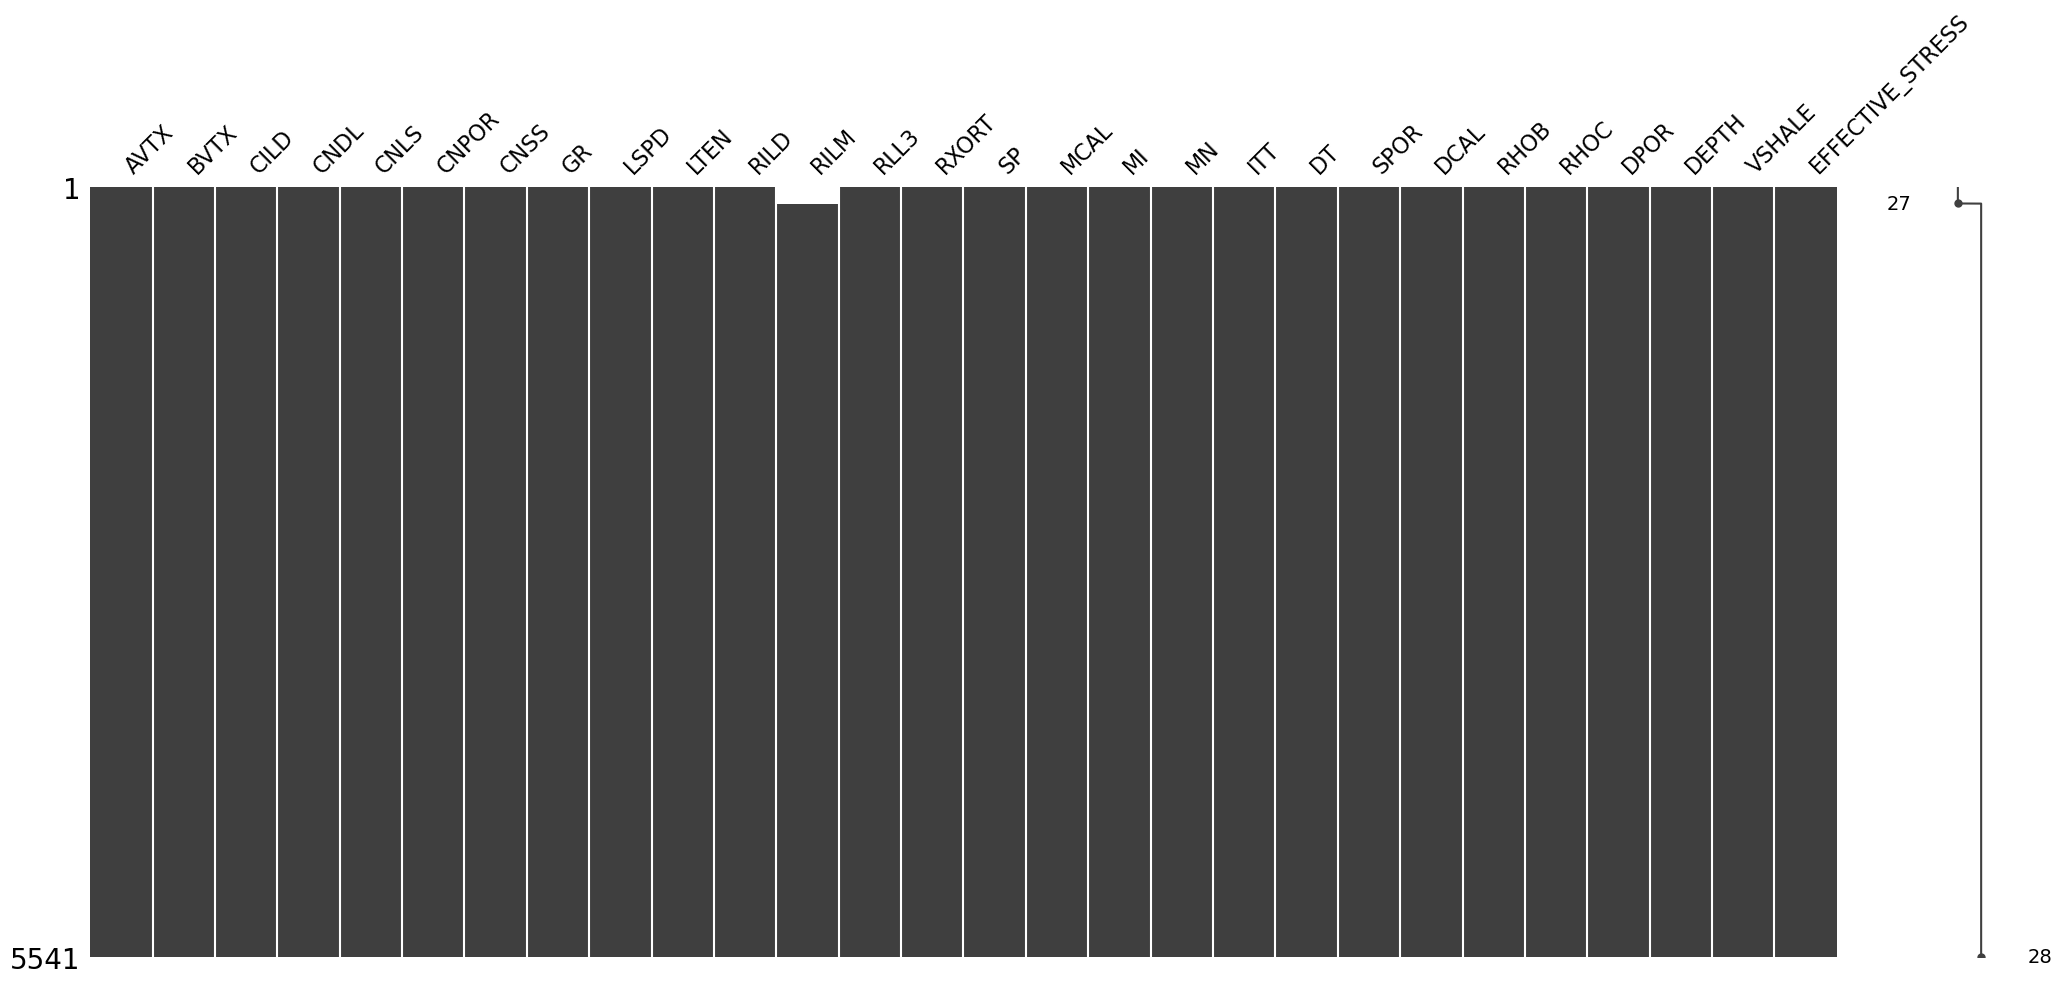

In [31]:

df['GR'][df['GR'] > 500] = np.nan
df['GR'][df['GR'] < 0] = np.nan

df['RILM'][df['RILM'] > 8500] = np.nan

df['RILD'][df['RILD'] > 2500] = np.nan

msno.matrix(df)

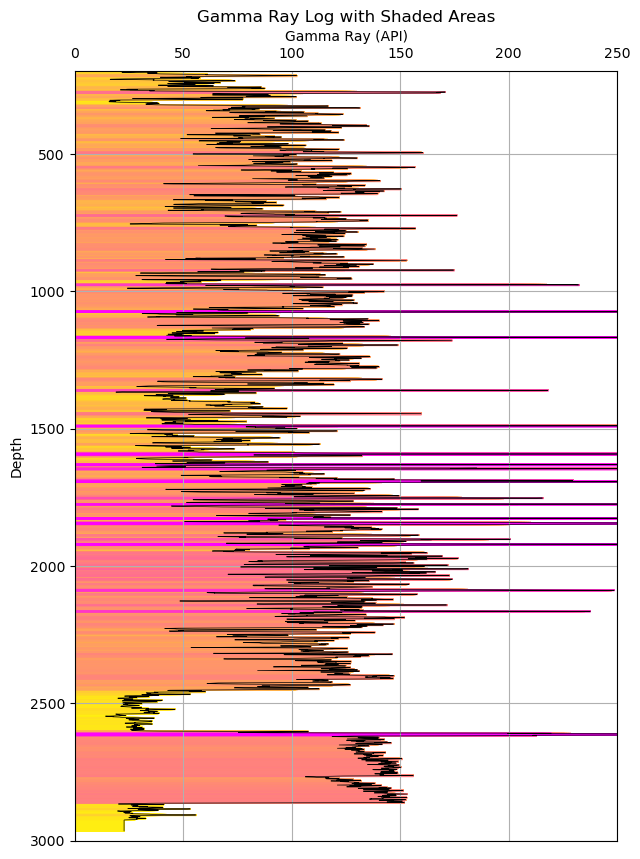

In [4]:
#classic logs of GR, RILD, RILM, RLL3 and SP


# Replace common placeholder values with NaN and interpolate
df.replace(-999.25, np.nan, inplace=True)
df.interpolate(method='linear', inplace=True)

# assign the column to a variable for easier reading
curve = df['GR']

left_col_value = 0
right_col_value = 300

# calculate the span of values
span = abs(left_col_value - right_col_value)

#assign a color map
cmap = plt.get_cmap('spring_r')

#create array of values to divide up the area under curve
color_index = np.arange(left_col_value, right_col_value, span / 100)

#setup the plot
ax = df.plot(x='GR', y='DEPTH', c='black', lw=0.5, legend=False, figsize=(7,10))

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel("Depth (ft)")
plt.title('Gamma Ray Plot with No Fill')
ax.set_xlabel("GR (API)")
ax.xaxis.set_label_position('top') 

#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(df['DEPTH'], curve, where = curve >= index,  color = color)

# Reverse the y-axis (depth should increase downwards)
ax.set_ylim(max(df.index), min(df.index))
plt.ylim(3000, 195)
plt.xlim(0, 250)
# Set labels and title
ax.set_xlabel('Gamma Ray (API)')
ax.set_ylabel('Depth')
ax.set_title('Gamma Ray Log with Shaded Areas')
ax.grid(True)

# Show the plot
plt.show()


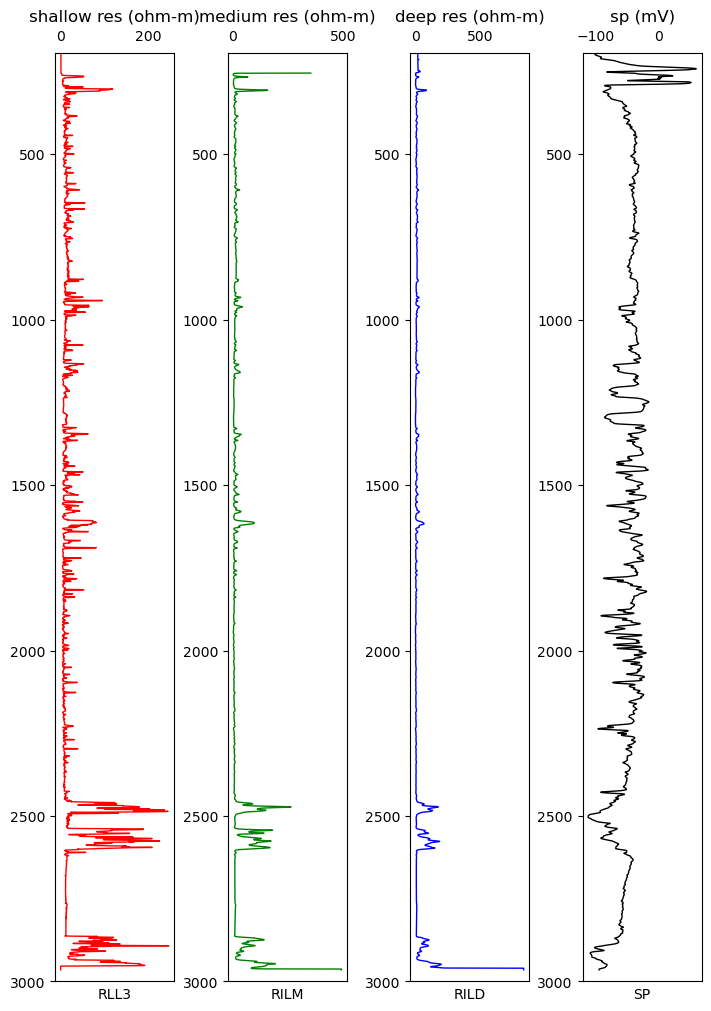

In [5]:
#logs of other properties

fig, axes = plt.subplots(nrows=1, ncols=4, constrained_layout = True)

# populate subplot 2 with RLL3
ax1 = df.plot(ax=axes[0], x ='RLL3', y='DEPTH', c='red', lw=1, legend=False, figsize=(7,10), ylim=[3000, 195], title= "shallow res (ohm-m)")
ax1.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# populate subplot 3 with RILM
ax2 = df.plot(ax=axes[1], x ='RILM', y='DEPTH', c='green', lw=1, legend=False, figsize=(7,10), ylim=[3000, 195], title= "medium res (ohm-m)")
ax2.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# populate subplot 4 with RLLD
ax3 = df.plot(ax=axes[2], x ='RILD', y='DEPTH', c='blue', lw=1, legend=False, figsize=(7,10), ylim=[3000, 195], title= "deep res (ohm-m)")
ax3.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# populate subplot 4 with RLLD
ax4 = df.plot(ax=axes[3], x ='SP', y='DEPTH', c='black', lw=1, legend=False, figsize=(7,10), ylim=[3000, 195], title= "sp (mV)")
ax4.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)


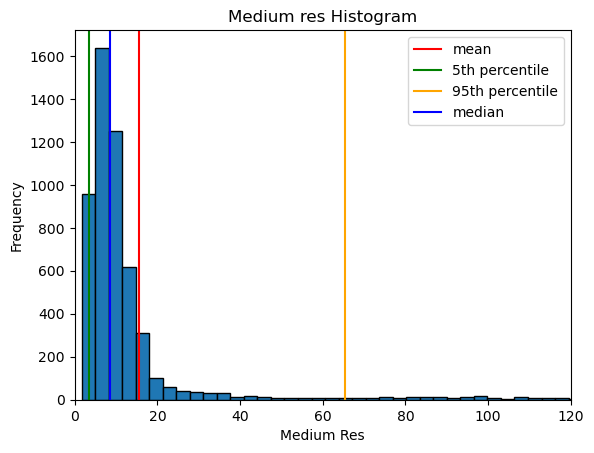

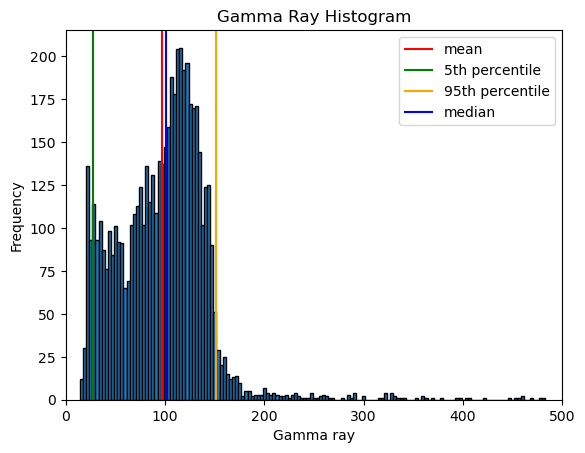

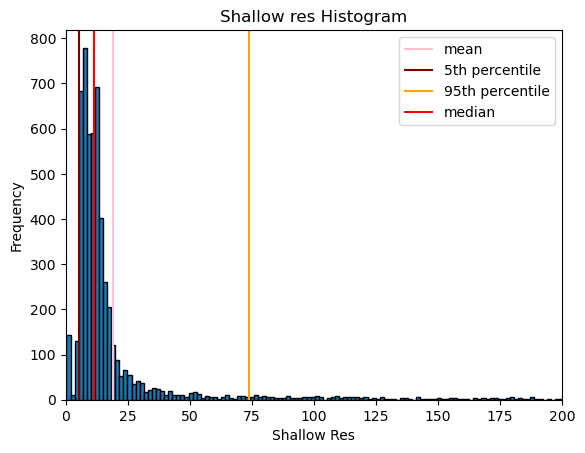

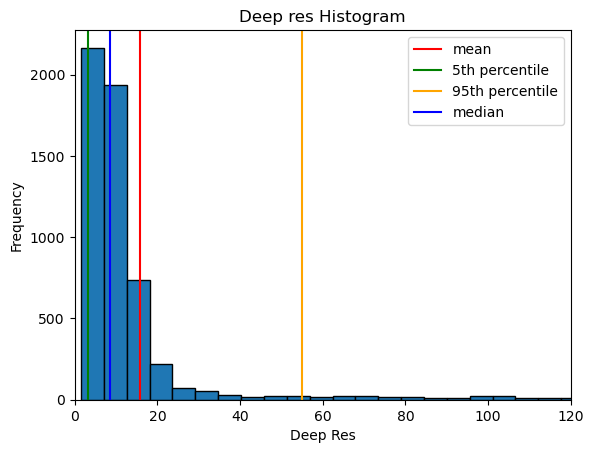

In [6]:
#histograms with mean and standard dev

#MEDIUM RES HISTOGRAM

meanRILM = df['RILM'].mean()
p5_RILM = df['RILM'].quantile(0.05)
p95_RILM = df['RILM'].quantile(0.95)
medianRILM = df['RILM'].median()

plotRILM = plt.hist(df['RILM'], 150, edgecolor = 'black')
plt.xlabel('Medium Res')
plt.ylabel('Frequency')
plt.title('Medium res Histogram')
plt.axvline(meanRILM, color = 'red', label = 'mean')
plt.axvline(p5_RILM, color = 'green', label = '5th percentile')
plt.axvline(p95_RILM, color = 'orange', label = '95th percentile')
plt.axvline(medianRILM, color = 'blue', label = 'median')
plt.xlim(0,120)
plt.legend()
plt.show(plotRILM)

#GAMMA RAY HISTOGRAM

meanGR = df['GR'].mean()
p5_GR = df['GR'].quantile(0.05)
p95_GR = df['GR'].quantile(0.95)
medianGR = df['GR'].median()

plotGR = plt.hist(df['GR'], 150, edgecolor = 'black')
plt.xlabel('Gamma ray')
plt.ylabel('Frequency')
plt.title('Gamma Ray Histogram')
plt.axvline(meanGR, color = 'red', label = 'mean')
plt.axvline(p5_GR, color = 'green', label = '5th percentile')
plt.axvline(p95_GR, color = 'orange', label = '95th percentile')
plt.axvline(medianGR, color = 'blue', label = 'median')
plt.xlim(0,500)
plt.legend()
plt.show(plotGR)

#SHALLOW RES HISTOGRAM

meanRLL3 = df['RLL3'].mean()
p5_RLL3 = df['RLL3'].quantile(0.05)
p95_RLL3 = df['RLL3'].quantile(0.95)
medianRLL3 = df['RLL3'].median()

plotRLL3 = plt.hist(df['RLL3'], 150, edgecolor = 'black')
plt.xlabel('Shallow Res')
plt.ylabel('Frequency')
plt.title('Shallow res Histogram')
plt.axvline(meanRLL3, color = 'pink', label = 'mean')
plt.axvline(p5_RLL3, color = 'maroon', label = '5th percentile')
plt.axvline(p95_RLL3, color = 'orange', label = '95th percentile')
plt.axvline(medianRLL3, color = 'red', label = 'median')
plt.xlim(0,200)
plt.legend()
plt.show(plotRLL3)

#DEEP RES HISTOGRAM

meanRILD = df['RILD'].mean()
p5_RILD = df['RILD'].quantile(0.05)
p95_RILD = df['RILD'].quantile(0.95)
medianRILD = df['RILD'].median()

plotRILD = plt.hist(df['RILD'], 150, edgecolor = 'black')
plt.xlabel('Deep Res')
plt.ylabel('Frequency')
plt.title('Deep res Histogram')
plt.axvline(meanRILD, color = 'red', label = 'mean')
plt.axvline(p5_RILD, color = 'green', label = '5th percentile')
plt.axvline(p95_RILD, color = 'orange', label = '95th percentile')
plt.axvline(medianRILD, color = 'blue', label = 'median')
plt.xlim(0,120)
plt.legend()
plt.show(plotRILD)


In [ ]:
ax5 = df.plot(ax=axes[2], x ='RILD', y='DEPTH', c='blue', lw=1, legend=False, figsize=(7,10), ylim=[3000, 195], title= "deep res (ohm-m)")
ax5.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# populate subplot 4 with RLLD
ax5 = df.plot(ax=axes[3], x ='SP', y='DEPTH', c='black', lw=1, legend=False, figsize=(7,10), ylim=[3000, 195], title= "sp (mV)")
ax5.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)



In [32]:

# Function to calculate V-Shale (using Gamma Ray log)
def calculate_vshale(gamma_ray, gamma_ray_max, gamma_ray_min):
    return ((gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min))

# Add V-Shale column to DataFrame
df['VSHALE'] = calculate_vshale(df['GR'], df['GR'].max(), df['GR'].min())

# Function to calculate Effective Stress (using RHOB and Depth)
def calculate_effective_stress(rhob, depth, fluid_density=1.0):
    # Assuming fluid_density in g/cc, depth in meters, and g (gravity) = 9.81 m/s²
    return rhob * 9.81 * depth - fluid_density * 9.81 * depth

# Add Effective Stress column to DataFrame
df['EFFECTIVE_STRESS'] = calculate_effective_stress(df['RHOB'], df.index)


# poro perm

In [8]:
#DATA IMPORT AND CLEANING

import numpy as np

# Load the CSV file containing poro-perm data
dfp = pd.read_csv('poro_perm_data.csv')


# Basic data cleaning steps
# Identify and handle the doctored values (e.g., unrealistic porosity or permeability values)
dfp['Porosity (%)'] = dfp['Porosity (%)'].apply(lambda x: np.nan if x < 0 else x)
dfp['Permeability (mD)'] = dfp['Permeability (mD)'].apply(lambda x: np.nan if x < 0 else x)

# fill NaN values if necessary
dfp.fillna(method='bfill', inplace=True)

dfp = dfp.drop(list(range(118,120)))
display(dfp)


,Depth (ft),Porosity (%),Permeability (mD),Facies
0,1863.5,14.427556,31.053211,'overbanks'
1,2515.0,16.733522,12.412608,'channel'
2,1608.0,20.211138,95.735554,'crevasse splay'
3,201.0,0.399182,21.324455,'channel'
4,2580.0,14.533879,53.694037,'crevasse splay'
...,...,...,...,...
116,754.0,10.474512,51.393491,'crevasse splay'
117,2580.5,0.399182,21.324455,'channel'
120,1433.0,24.684013,36.206107,'channel'
121,2528.0,24.684013,36.206107,'channel'


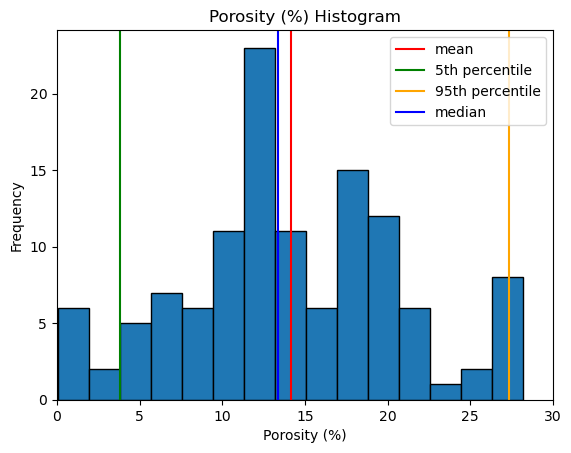

In [9]:
mean_phi = dfp['Porosity (%)'].mean()
p5_phi = dfp['Porosity (%)'].quantile(0.05)
p95_phi = dfp['Porosity (%)'].quantile(0.95)
median_phi = dfp['Porosity (%)'].median()

plot_phi = plt.hist(dfp['Porosity (%)'],15, edgecolor = 'black')
plt.xlabel('Porosity (%)')
plt.ylabel('Frequency')
plt.title('Porosity (%) Histogram')
plt.axvline(mean_phi, color = 'red', label = 'mean')
plt.axvline(p5_phi, color = 'green', label = '5th percentile')
plt.axvline(p95_phi, color = 'orange', label = '95th percentile')
plt.axvline(median_phi, color = 'blue', label = 'median')
plt.xlim(0,30)
plt.legend()
plt.show(plot_phi)

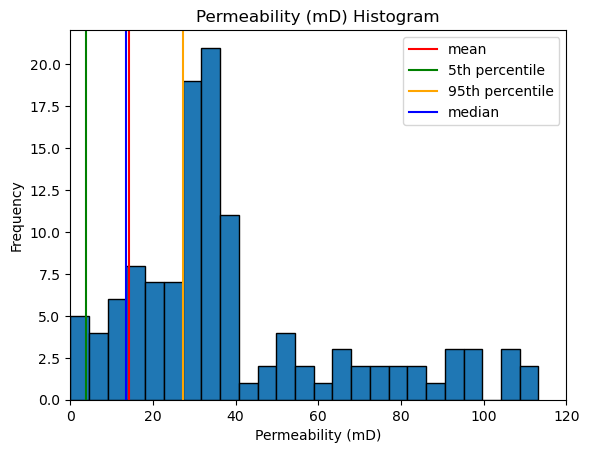

In [10]:
#Permeability

mean_perm = dfp['Permeability (mD)'].mean()
p5_perm = dfp['Permeability (mD)'].quantile(0.05)
p95_perm = dfp['Permeability (mD)'].quantile(0.95)
median_perm = dfp['Permeability (mD)'].median()

plot_perm = plt.hist(dfp['Permeability (mD)'], 25, edgecolor = 'black')
plt.xlabel('Permeability (mD)')
plt.ylabel('Frequency')
plt.title('Permeability (mD) Histogram')
plt.axvline(mean_phi, color = 'red', label = 'mean')
plt.axvline(p5_phi, color = 'green', label = '5th percentile')
plt.axvline(p95_phi, color = 'orange', label = '95th percentile')
plt.axvline(median_phi, color = 'blue', label = 'median')
plt.xlim(0,120)
plt.legend()
plt.show(plot_perm)

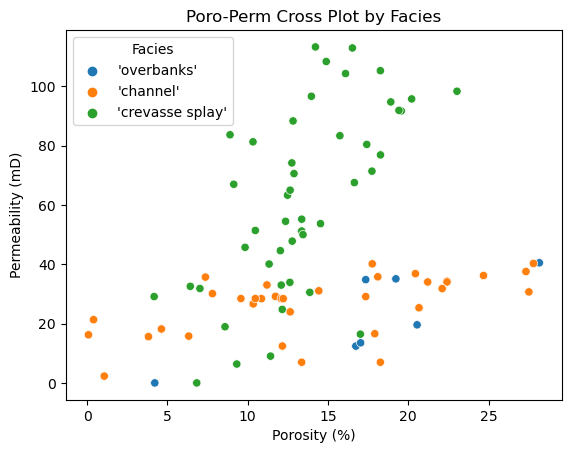

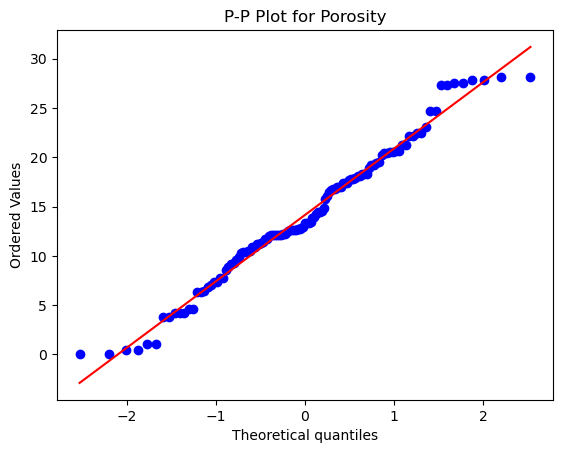

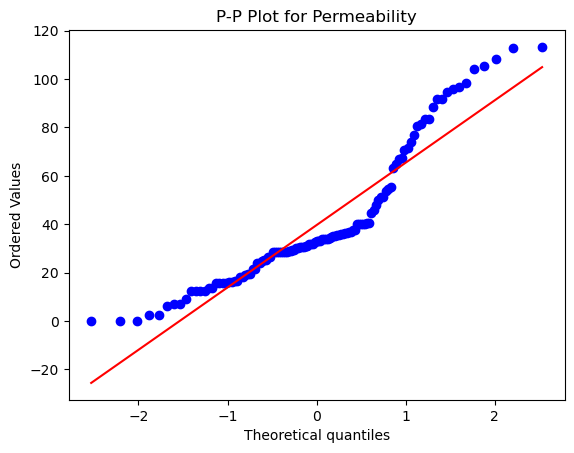

In [11]:
#cross plot
import seaborn as sns
import scipy.stats as stats
# Cross plots with different markers for facies
# Ensure 'facies' is a category and then plot
if 'Facies' in dfp.columns:
    sns.scatterplot(data=dfp, x='Porosity (%)', y='Permeability (mD)', hue='Facies')
    plt.title('Poro-Perm Cross Plot by Facies')
    plt.show()
else:
    print("'facies' column does not exist in the DataFrame.")

# P-P plots (probability-probability plots)
stats.probplot(dfp['Porosity (%)'], dist="norm", plot=plt)
plt.title('P-P Plot for Porosity')
plt.show()

stats.probplot(dfp['Permeability (mD)'], dist="norm", plot=plt)
plt.title('P-P Plot for Permeability')
plt.show()

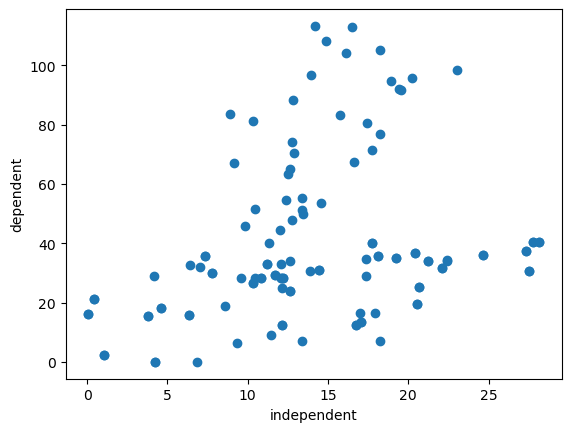

r_sq =  0.07764458030310717


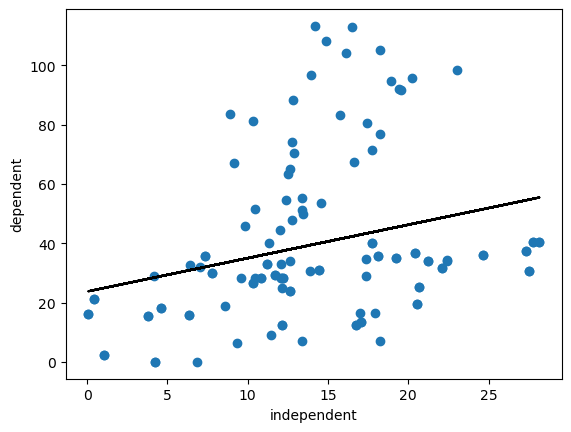

In [12]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
X = dfp['Porosity (%)']
Y = dfp['Permeability (mD)']
plt.scatter(X,Y)
plt.xlabel('independent')
plt.ylabel('dependent')
plt.show()

X,Y = np.array(X),np.array(Y)
X = X.reshape(-1,1)

model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
print('r_sq = ', r_sq)

y_pred = model.predict(X)

plt.scatter(X,Y)
plt.plot(X,y_pred, color="k")

plt.xlabel('independent')
plt.ylabel('dependent')

plt.show()

C:\Users\imane.kahramane\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


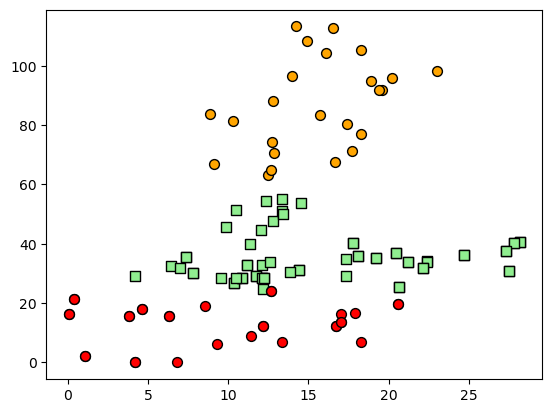

In [13]:
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)
XY = np.hstack((X,Y))
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(XY)

# plot clusters
plt.scatter(
    XY[y_km == 0, 0], XY[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    XY[y_km == 1, 0], XY[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    XY[y_km == 2, 0], XY[y_km == 2, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 3'
)

In [14]:
logi1 = dfp['Facies'] == "'overbanks'"
logi1

0       True
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
120    False
121    False
122    False
Name: Facies, Length: 121, dtype: bool

In [15]:
POB = dfp['Porosity (%)'][logi1]

In [16]:
logi2 = dfp['Facies'] == "'channel'"
logi2

0      False
1       True
2      False
3       True
4      False
       ...  
116    False
117     True
120     True
121     True
122    False
Name: Facies, Length: 121, dtype: bool

In [17]:
PCB = dfp['Porosity (%)'][logi2]

In [18]:
logi3 = dfp['Facies'] == "'crevasse splay'"
logi3

0      False
1      False
2       True
3      False
4       True
       ...  
116     True
117    False
120    False
121    False
122     True
Name: Facies, Length: 121, dtype: bool

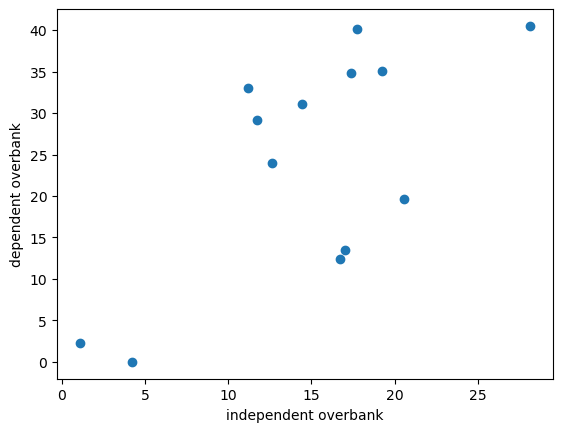

r_sq =  0.459755868992228


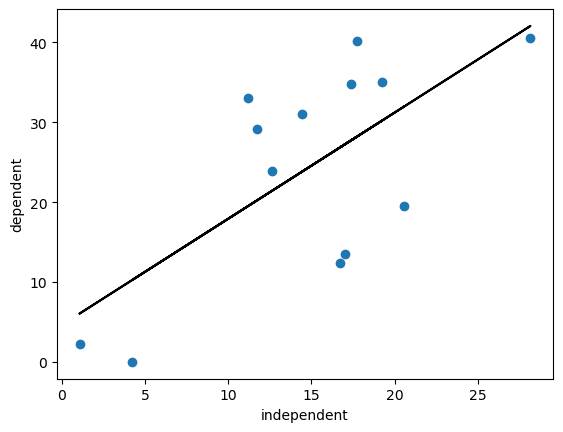

In [19]:
logi = dfp['Facies']=="'overbanks'"
logi1 = dfp['Facies']=="'channel'"
logi2 = dfp['Facies']=="'crevasse splay'"

pOB = dfp['Porosity (%)'][logi]
kOB = dfp['Permeability (mD)'][logi]
pCH = dfp['Porosity (%)'][logi1]
kCH = dfp['Permeability (mD)'][logi1]

plt.scatter(pOB,kOB)
plt.xlabel('independent overbank')
plt.ylabel('dependent overbank')
plt.show()

pOB,kOB = np.array(pOB),np.array(kOB)
pOB = pOB.reshape(-1,1)
model1 = LinearRegression()
model1.fit(pOB, kOB)
r_sq1 = model1.score(pOB, kOB)
print('r_sq = ', r_sq1)

y_pred1 = model1.predict(pOB)
plt.scatter(pOB,kOB)
plt.plot(pOB,y_pred1, color="k")
plt.xlabel('independent')
plt.ylabel('dependent')
plt.show()

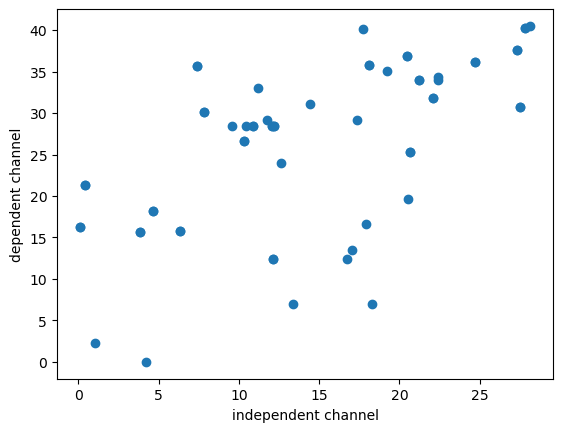

r_sq =  0.35273786100134985


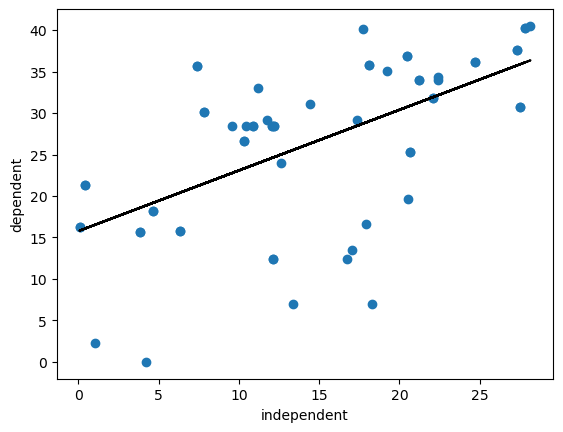

In [20]:
pCH = dfp['Porosity (%)'][logi1]
kCH = dfp['Permeability (mD)'][logi1]

plt.scatter(pCH,kCH)
plt.xlabel('independent channel')
plt.ylabel('dependent channel')
plt.show()

pCH,kCH = np.array(pCH),np.array(kCH)
pCH = pCH.reshape(-1,1)
model2 = LinearRegression()
model2.fit(pCH, kCH)
r_sq2 = model2.score(pCH, kCH)
print('r_sq = ', r_sq2)

y_pred2 = model2.predict(pCH)
plt.scatter(pCH,kCH)
plt.plot(pCH,y_pred2, color="k")
plt.xlabel('independent')
plt.ylabel('dependent')
plt.show()

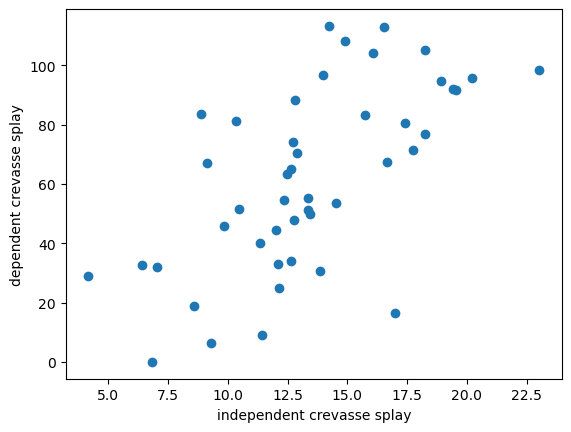

r_sq =  0.402162645006766


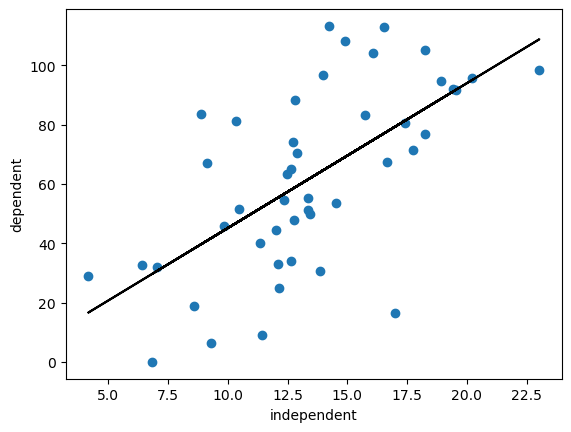

In [21]:
pCS = dfp['Porosity (%)'][logi2]
kCS = dfp['Permeability (mD)'][logi2]

plt.scatter(pCS,kCS)
plt.xlabel('independent crevasse splay')
plt.ylabel('dependent crevasse splay')
plt.show()

pCS,kCS = np.array(pCS),np.array(kCS)
pCS = pCS.reshape(-1,1)
model3 = LinearRegression()
model3.fit(pCS, kCS)
r_sq3 = model3.score(pCS, kCS)
print('r_sq = ', r_sq3)

y_pred3 = model3.predict(pCS)
plt.scatter(pCS,kCS)
plt.plot(pCS,y_pred3, color="k")
plt.xlabel('independent')
plt.ylabel('dependent')
plt.show()

In [22]:
x = dfp.drop('Facies',axis=1)
y = dfp['Facies']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4),max_iter=1000)

mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)

import numpy as np
result = np.vstack((y_test, predictions))
print(result)

[["'channel'" "'crevasse splay'" "'crevasse splay'" "'channel'"
  "'crevasse splay'" "'crevasse splay'" "'overbanks'" "'channel'"
  "'crevasse splay'" "'channel'" "'crevasse splay'" "'channel'"
  "'channel'" "'crevasse splay'" "'channel'" "'overbanks'"
  "'crevasse splay'" "'crevasse splay'" "'channel'" "'crevasse splay'"
  "'channel'" "'channel'" "'crevasse splay'" "'channel'" "'channel'"
  "'overbanks'" "'crevasse splay'" "'overbanks'" "'channel'" "'channel'"
  "'overbanks'"]
 ["'channel'" "'channel'" "'channel'" "'crevasse splay'"
  "'crevasse splay'" "'channel'" "'channel'" "'channel'" "'channel'"
  "'crevasse splay'" "'crevasse splay'" "'channel'" "'channel'"
  "'crevasse splay'" "'channel'" "'crevasse splay'" "'crevasse splay'"
  "'crevasse splay'" "'channel'" "'crevasse splay'" "'channel'"
  "'channel'" "'crevasse splay'" "'channel'" "'channel'" "'channel'"
  "'crevasse splay'" "'channel'" "'channel'" "'channel'" "'channel'"]]


C:\Users\imane.kahramane\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
logi = predictions == y_test

100 / len(logi) *np.sum(logi)

64.51612903225806

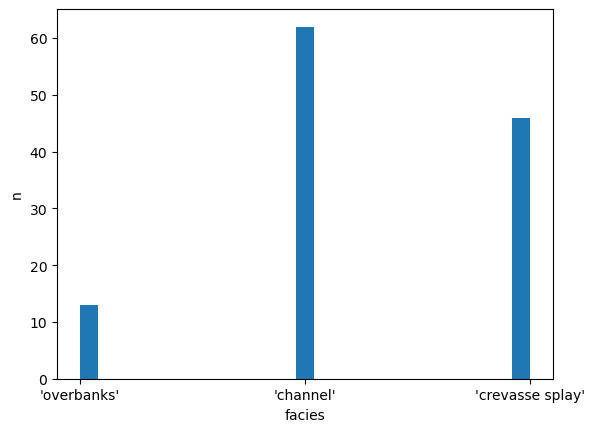

In [26]:
plt.hist(dfp['Facies'],25)
plt.xlabel('facies')
plt.ylabel('n')
plt.show()

In [27]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result_1 = anderson(dfp['Porosity (%)'])
print('Statistic: %.3f' % result_1.statistic)
p = 0
# interpret results
for i in range(len(result_1.critical_values)):
    slevel, cvalues = result_1.significance_level[i], result_1.critical_values[i]
    if result_1.statistic < result_1.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: 0.537
15.000: 0.558, data looks normal (fail to reject H0)
10.000: 0.636, data looks normal (fail to reject H0)
5.000: 0.763, data looks normal (fail to reject H0)
2.500: 0.890, data looks normal (fail to reject H0)
1.000: 1.059, data looks normal (fail to reject H0)


In [28]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result_2 = anderson(dfp['Permeability (mD)'])
print('Statistic: %.3f' % result_1.statistic)
p = 0
# interpret results
for i in range(len(result_2.critical_values)):
    slevel, cvalues = result_2.significance_level[i], result_2.critical_values[i]
    if result_2.statistic < result_2.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: 0.537
15.000: 0.558, data does not look normal (reject H0)
10.000: 0.636, data does not look normal (reject H0)
5.000: 0.763, data does not look normal (reject H0)
2.500: 0.890, data does not look normal (reject H0)
1.000: 1.059, data does not look normal (reject H0)


# Image Analysis

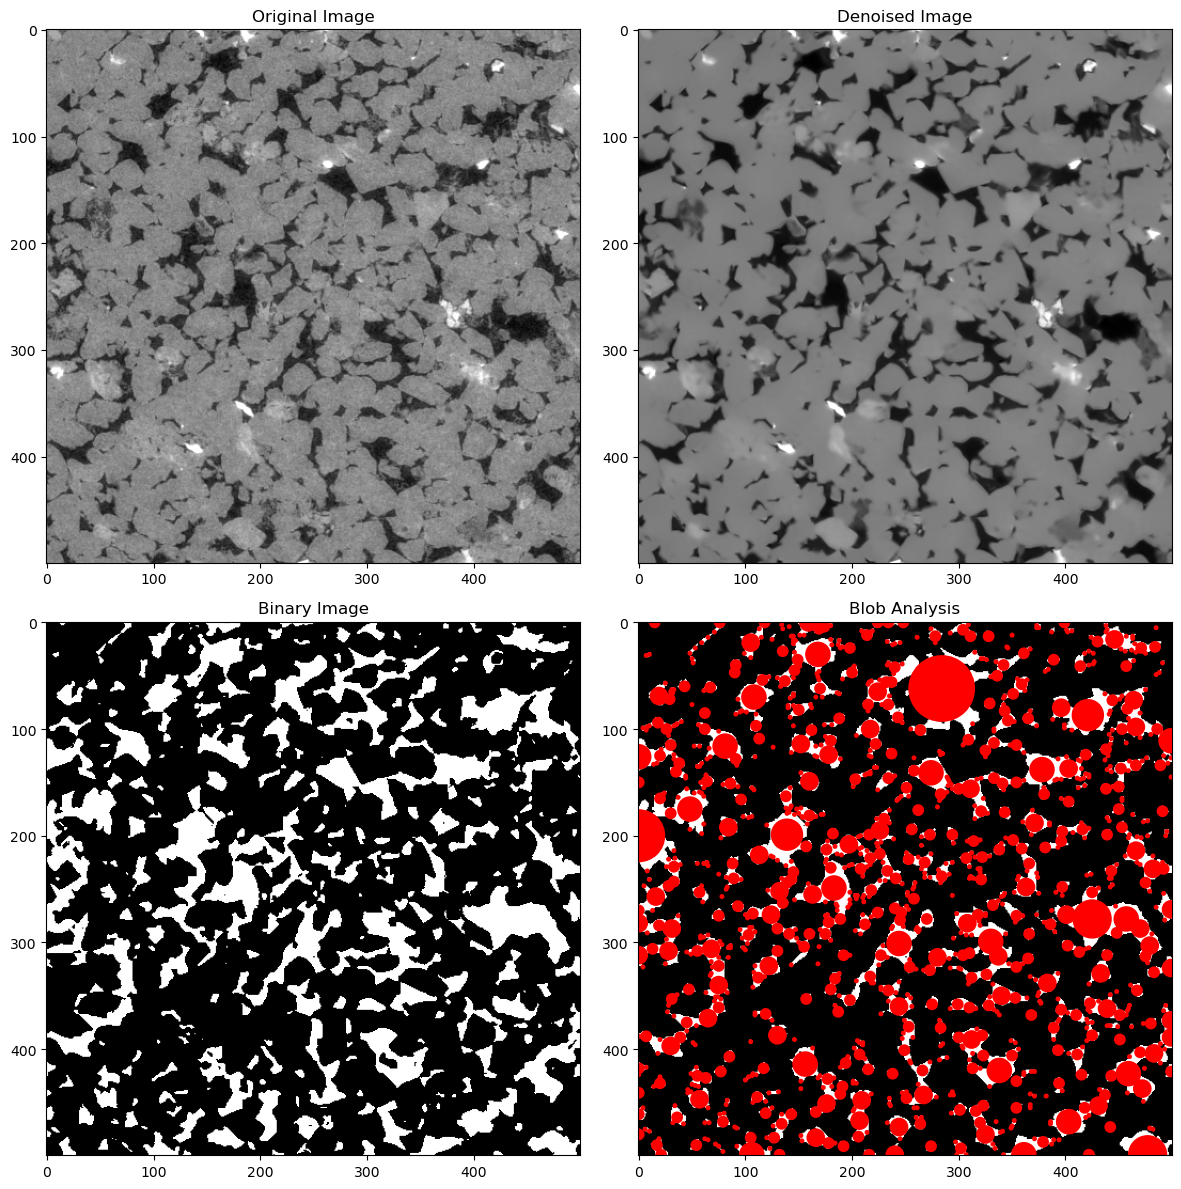

Estimated Porosity: 0.25972
Estimated Permeability: 1.413324152992312e-06


In [29]:
from skimage import io, restoration, measure, feature, color
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the image
image_path = 'berea8bit.tif'
image = io.imread(image_path)

# Apply non-local means denoising
denoised_image = restoration.denoise_nl_means(image, h=0.05)  # Adjust 'h' as needed

# Convert to binary image (adjust threshold as needed)
threshold = np.mean(denoised_image)  # Example threshold
binary_image = denoised_image < threshold

# Simple porosity estimation
porosity = np.sum(binary_image) / np.prod(binary_image.shape)

# Kozeny-Carman permeability estimation
def estimate_permeability(porosity, grain_size):
    return (1/(72*math.pi))*(porosity**3)*(grain_size**2)/((1-porosity)**2)
grain_size=0.1
permeability = estimate_permeability(porosity, grain_size)

# Blob analysis for pore size
blobs = feature.blob_log(binary_image, max_sigma=30, threshold=0.09)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(denoised_image, cmap='gray')
ax[1].set_title('Denoised Image')

ax[2].imshow(binary_image, cmap='gray')
ax[2].set_title('Binary Image')

# Blob visualization
ax[3].imshow(binary_image, cmap='gray')
for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=True)
    ax[3].add_patch(c)
ax[3].set_title('Blob Analysis')

plt.tight_layout()
plt.show()

# Output results
print(f"Estimated Porosity: {porosity}")
print(f"Estimated Permeability: {permeability}")